In [8]:
# import neccessary stuff 
#run this from the datascience-films folder
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
# ignore some warnings, not pressing to fix these issues, more annoying to show these
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

RESOURCE_PATH = Path('../cleaned_data')

df = pd.read_csv(RESOURCE_PATH / 'final_data_movies.csv',sep=',')
# df['years_after_event'] = df['years_after_event'].fillna(0)
df = df.dropna()

In [9]:
df['numVotes'] = df['numVotes'].fillna(0)
#lastly pop our target we want
target = df[['years_after_event','averageRating','numVotes']]
target.averageRating =  target.averageRating.fillna(5)
target['numVotes'] = target['numVotes'].fillna(0)
target['numVotes'] = target['numVotes'].astype(np.int64)
target['averageRating'] = target['averageRating'].fillna(1)
target['averageRating'] = target['averageRating'].astype(np.int64)


In [10]:
# split genres per genre and create column per genre
unique_genres = pd.unique(df["genres"].str.split(",", expand=True).stack())
df = df.join(df.pop('genres').str.get_dummies(sep=',').astype(bool))
df = df.join(df.pop('historical_event').str.join('').str.get_dummies().astype(bool))

In [11]:
# get numeric features and set as target
numeric_feature_names = list(unique_genres)
numeric_features = df[numeric_feature_names]

In [12]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 65% : 35%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(numeric_features, target, test_size = 0.3, random_state=10)
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(161, 16)
(161, 3)
(69, 16)
(69, 3)


In [13]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("\n")

y_test_predict = linear_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 98398.495372538
R2 score is 0.4156589863802123


The model performance for testing set
--------------------------------------
RMSE is 28628.535140702923
R2 score is -2.9112841142824037


# Visualizing the data

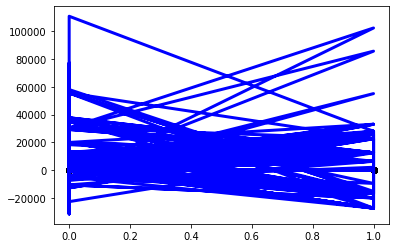

In [7]:
plt.scatter(X_test.Action,X_test.Adventure, color="black")
plt.plot(X_test.Action, y_test_predict, color="blue", linewidth=3)


plt.show()